In [3]:
try:
    import qiskit
    import qiskit_aer
except ImportError:
    print("installing qiskit...")
    !pip install --quiet qiskit qiskit_aer
    import qiskit
    print("installed qiskit.")

!pip install --quiet matplotlib pylatexenc

installing qiskit...
installed qiskit.


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# pip install qiskit qiskit[visualization] qiskit_aer

# Use Aer's AerSimulator
simulator = AerSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a Hadamard gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)



Total count for 00 and 11 are: {'11': 501, '00': 499}


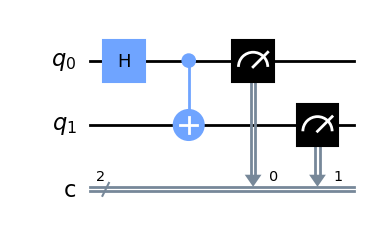

In [2]:
# Draw the circuit
circuit.draw("mpl")

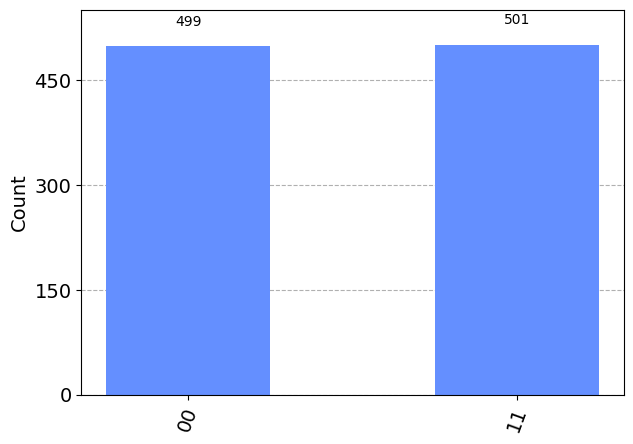

In [3]:
# Plot a histogram
plot_histogram(counts)